###### Perform clustering (hierarchical,K means clustering and DBSCAN) for the airlines data to obtain optimum number of clusters. Draw the inferences from the clusters obtained.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Supressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
Airline_data=pd.read_excel(r'C:\Users\Linta Stephen\Downloads\ExcelR\Assignments\7.Clustering\EastWestAirlines.xlsx',sheet_name='data')
Airline_data.head(3)

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0


###### Data Description: 
The file EastWestAirlinescontains information on passengers who belong to an airline’s frequent flier program. For each passenger the data include information on their mileage history and on different ways they accrued or spent miles in the last year. The goal is to try to identify clusters of passengers that have similar characteristics for the purpose of targeting different segments for different types of mileage offers.

In [4]:
Airline_data.columns

Index(['ID#', 'Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles',
       'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12',
       'Days_since_enroll', 'Award?'],
      dtype='object')

###### Columns
+ ID --Unique ID
+ Balance--Number of miles eligible for award travel
+ Qual_mile--Number of miles counted as qualifying for Topflight status
+ cc1_miles -- Number of miles earned with freq. flyer credit card in the past 12 months:
+ cc2_miles -- Number of miles earned with Rewards credit card in the past 12 months:
+ cc3_miles -- Number of miles earned with Small Business credit card in the past 12 months:
  + 1 = under 5,000
  + 2 = 5,000 - 10,000
  + 3 = 10,001 - 25,000
  + 4 = 25,001 - 50,000
  + 5 = over 50,000
+ Bonus_miles--Number of miles earned from non-flight bonus transactions in the past 12 months
+ Bonus_trans--Number of non-flight bonus transactions in the past 12 months
+ Flight_miles_12mo--Number of flight miles in the past 12 months
+ Flight_trans_12--Number of flight transactions in the past 12 months
+ Days_since_enrolled--Number of days since enrolled in flier program
+ Award--whether that person had award flight (free flight) or not

In [5]:
#Renaming some columns
Airline_data.rename(columns={'ID#':'ID','Award?':'Award'},inplace=True)

AirData=Airline_data.copy()
AirData
#Setting 'ID' as index column
Airline_data.set_index('ID',inplace=True)
Airline_data.head(3)

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
ID,,,,,,,,,,,
1,28143,0,1,1,1,174,1,0,0,7000,0
2,19244,0,1,1,1,215,2,0,0,6968,0
3,41354,0,1,1,1,4123,4,0,0,7034,0


In [6]:
Airline_data.columns

Index(['Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles',
       'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12',
       'Days_since_enroll', 'Award'],
      dtype='object')

In [7]:
Airline_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3999 entries, 1 to 4021
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Balance            3999 non-null   int64
 1   Qual_miles         3999 non-null   int64
 2   cc1_miles          3999 non-null   int64
 3   cc2_miles          3999 non-null   int64
 4   cc3_miles          3999 non-null   int64
 5   Bonus_miles        3999 non-null   int64
 6   Bonus_trans        3999 non-null   int64
 7   Flight_miles_12mo  3999 non-null   int64
 8   Flight_trans_12    3999 non-null   int64
 9   Days_since_enroll  3999 non-null   int64
 10  Award              3999 non-null   int64
dtypes: int64(11)
memory usage: 374.9 KB


In [8]:
Airline_data.isnull().sum()

Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award                0
dtype: int64

In [9]:
Airline_data.duplicated().sum()

1

In [10]:
Airline_data.describe()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
count,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


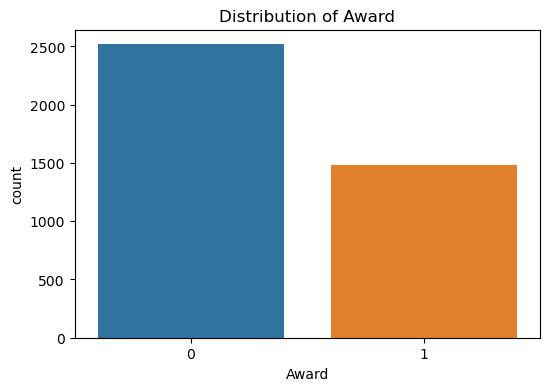

In [11]:
#plotting Award column
plt.figure(figsize=(6,4))
sns.countplot(x='Award',data=Airline_data)
plt.title('Distribution of Award')
plt.show()

In [12]:
countNoAward=len(Airline_data[Airline_data.Award==0])
counthaveAward=len(Airline_data[Airline_data.Award==1])
print("Percentage of customer doesn't have an Award: {:.2f}%".format((countNoAward/(len(Airline_data.Award))*100)))
print("Percentage of customer does have an Award: {:.2f}%".format((counthaveAward/(len(Airline_data.Award))*100)))

Percentage of customer doesn't have an Award: 62.97%
Percentage of customer does have an Award: 37.03%


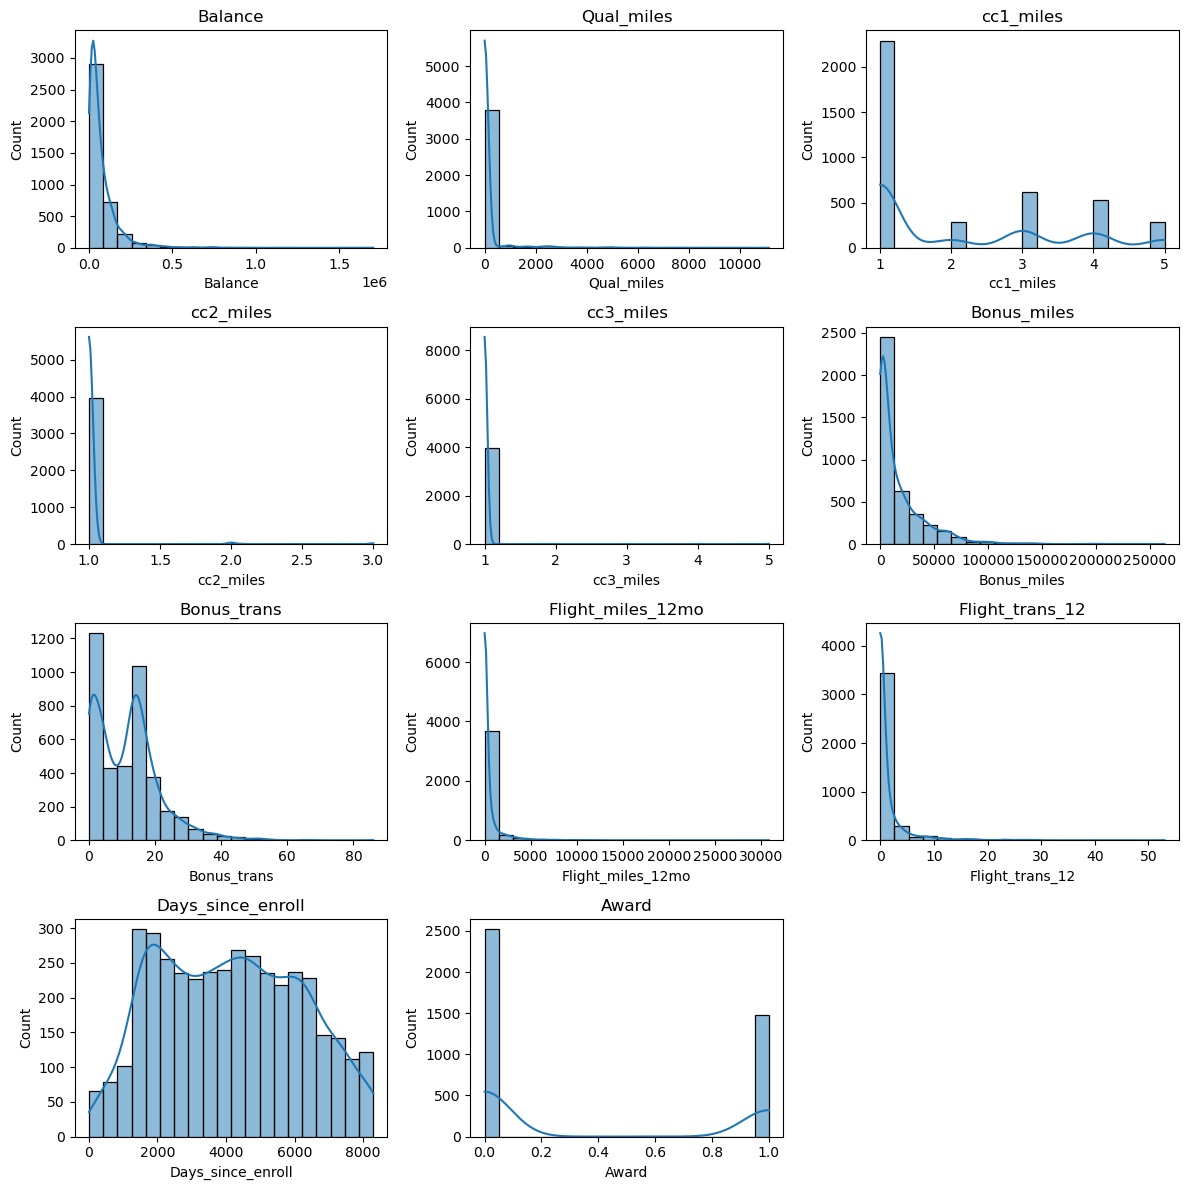

In [13]:
# Explore the distribution of numerical features
num_features=['Balance','Qual_miles','cc1_miles','cc2_miles','cc3_miles','Bonus_miles','Bonus_trans','Flight_miles_12mo','Flight_trans_12','Days_since_enroll','Award']

plt.figure(figsize=(12, 12))
for i,feature in enumerate(num_features,1):
    plt.subplot(4,3,i)
    sns.histplot(Airline_data[feature],bins=20,kde=True)              
    plt.title(feature)
plt.tight_layout()
plt.show()

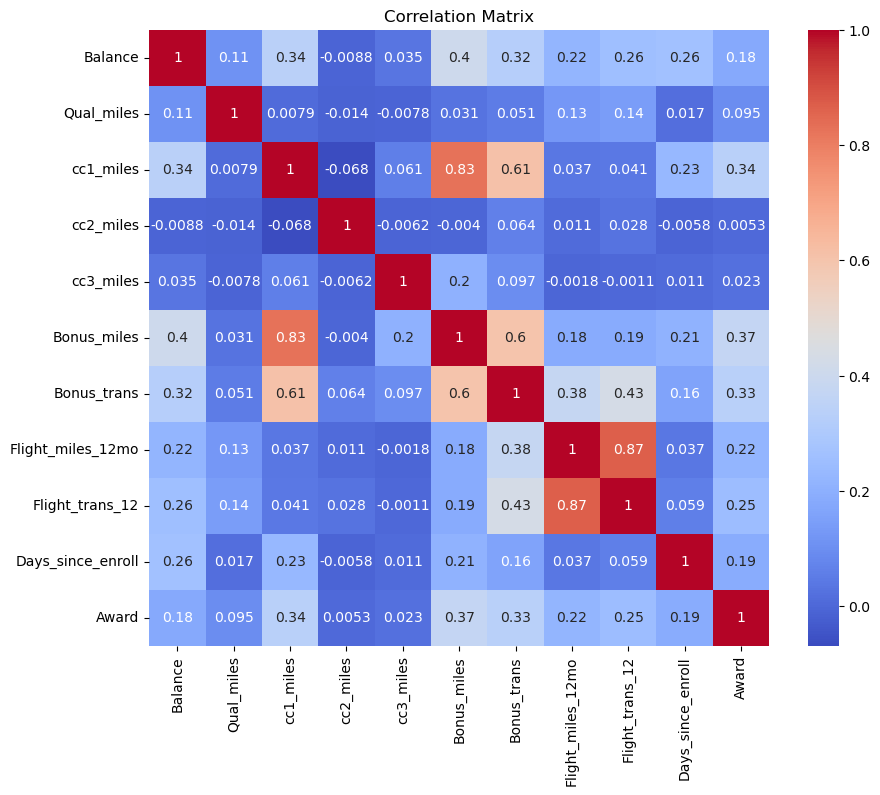

In [14]:
# Explore the correlation between numerical features
plt.figure(figsize=(10,8))
sns.heatmap(Airline_data.corr(),annot=True,cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

+ Number of miles earned with frequent flyer credit card in the past 12 months is positively correlated with number of miles earned from non-flight bonus transactions in the past 12 months & with Number of non-flight bonus transactions in the past 12 months.
+ Number of non-flight bonus transactions in the past 12 months is positively correlated with  number of miles earned from non-flight bonus transactions in the past 12 months.
+ Number of flight miles in the past 12 months is positively correlated with Number of flight transactions in the past 12 months.

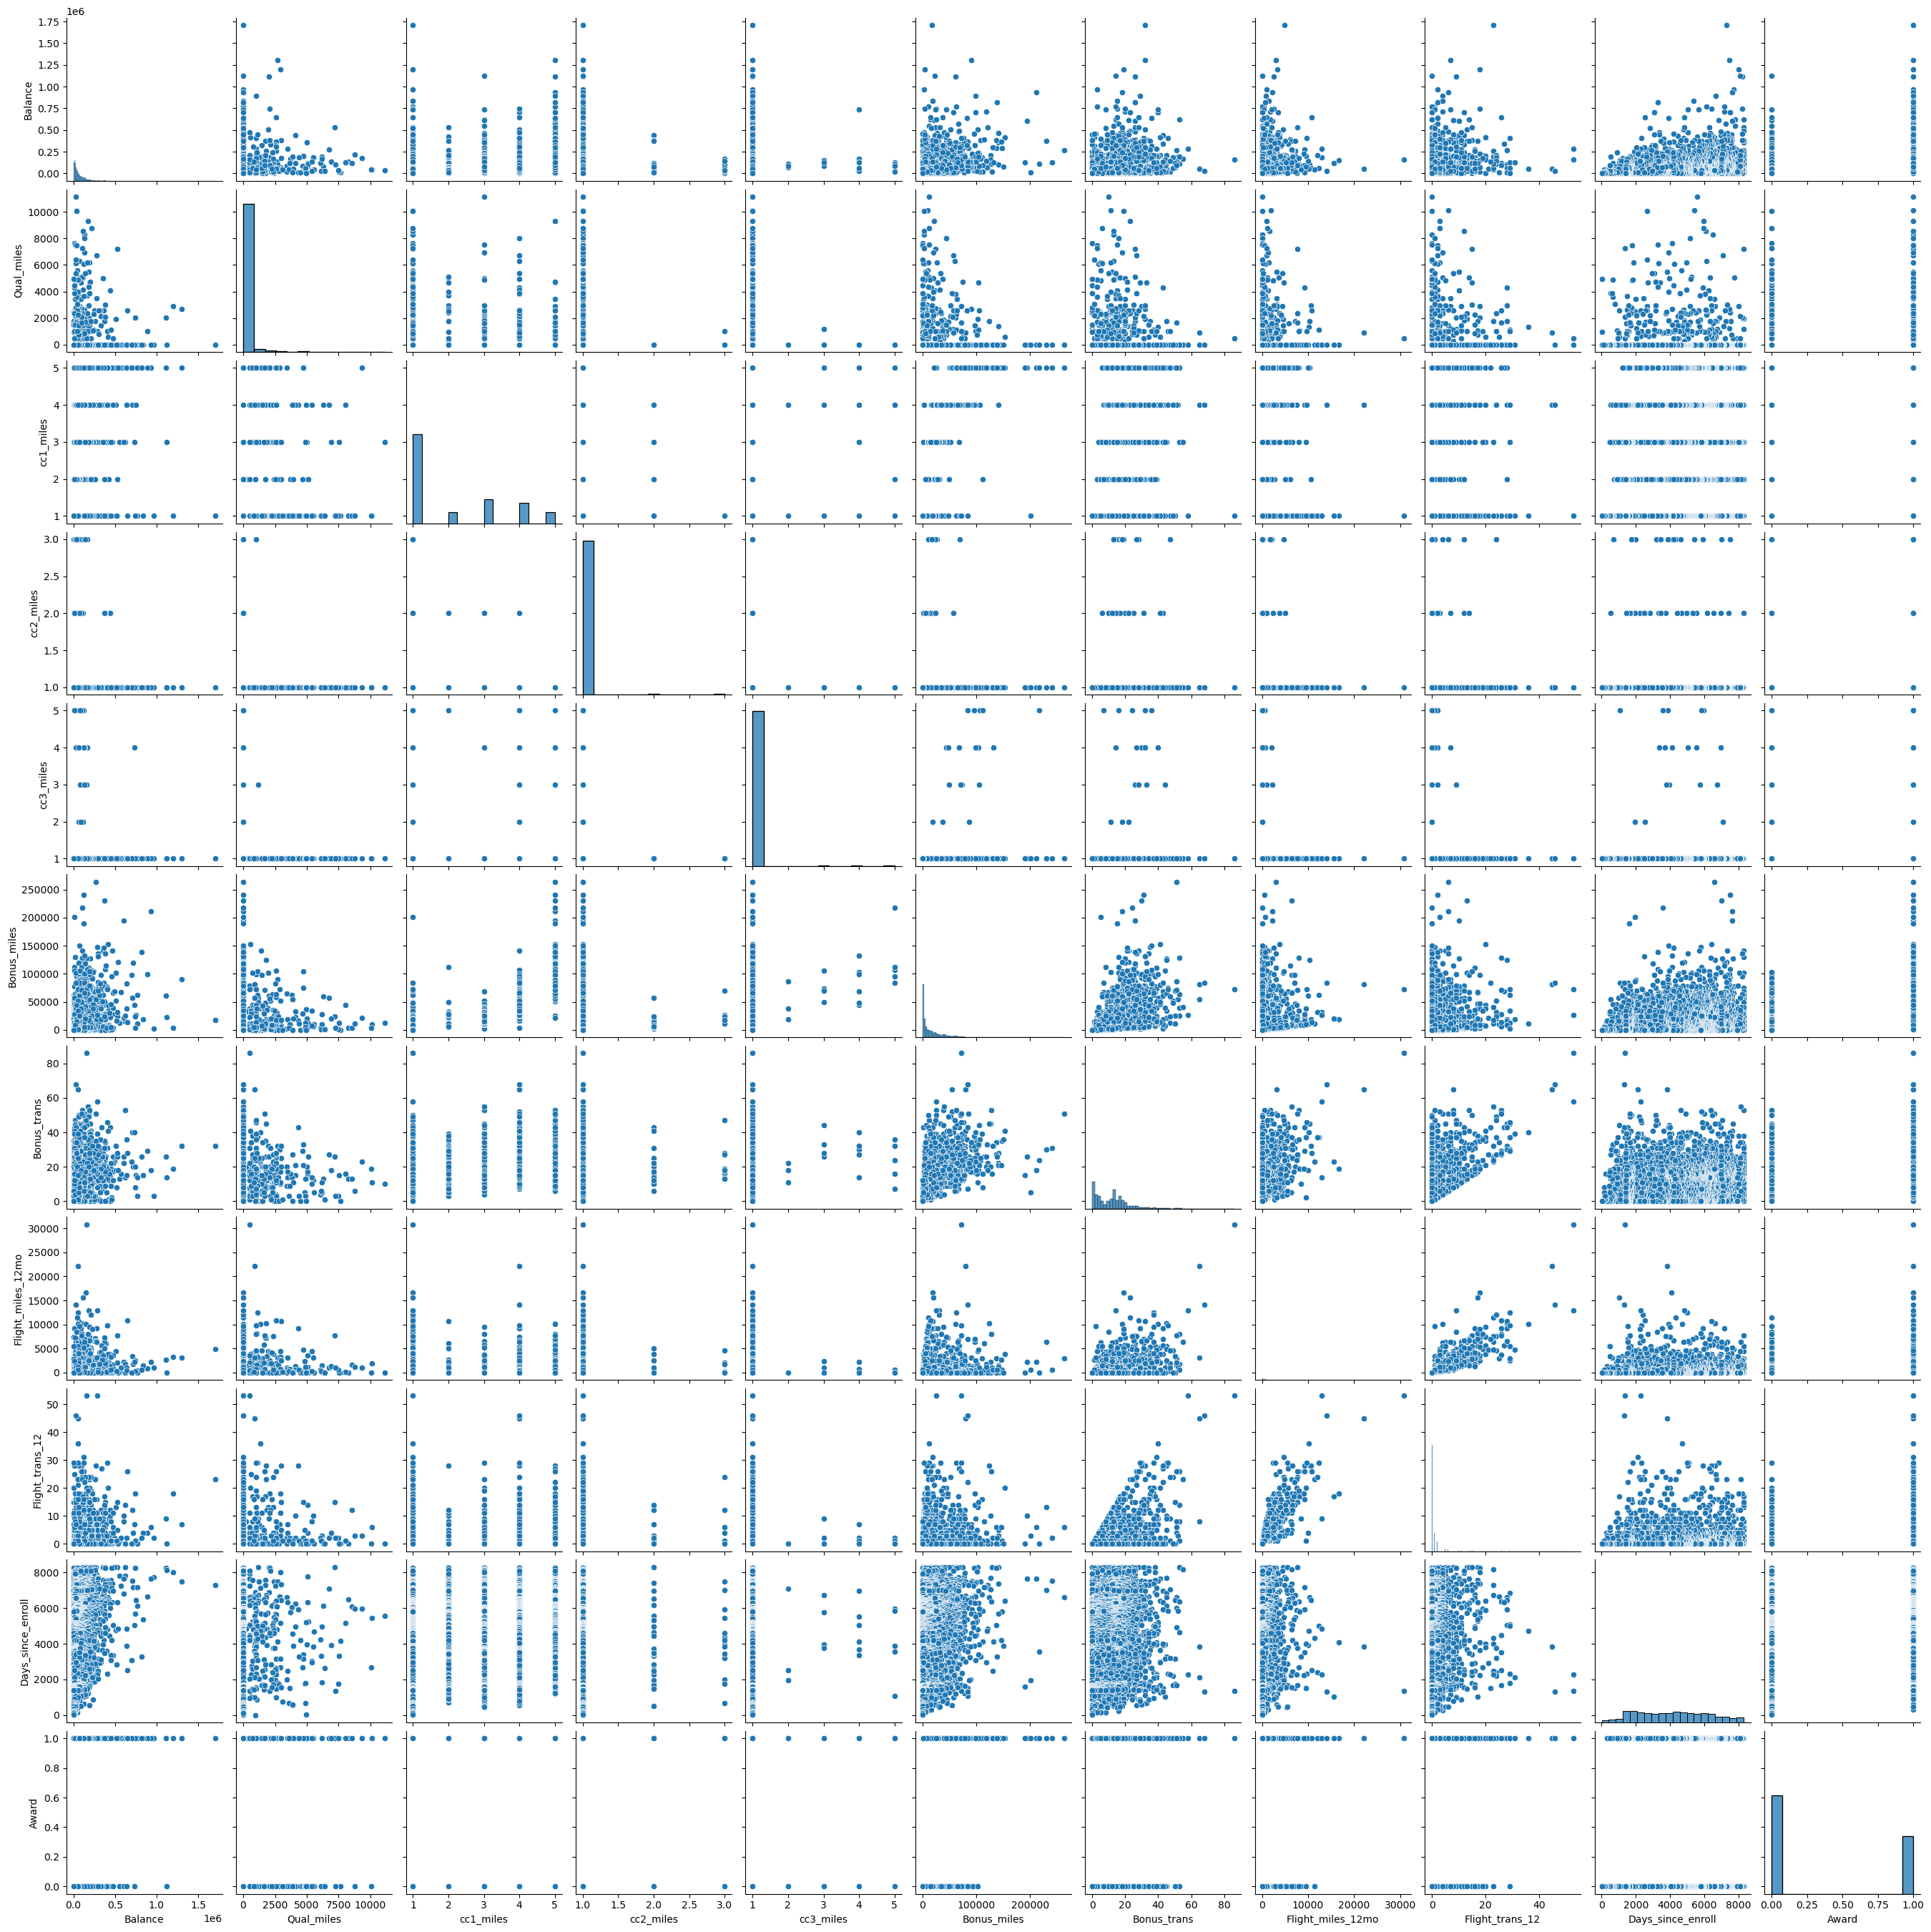

In [15]:
# Create the pair plot
sns.pairplot(Airline_data)
plt.show()

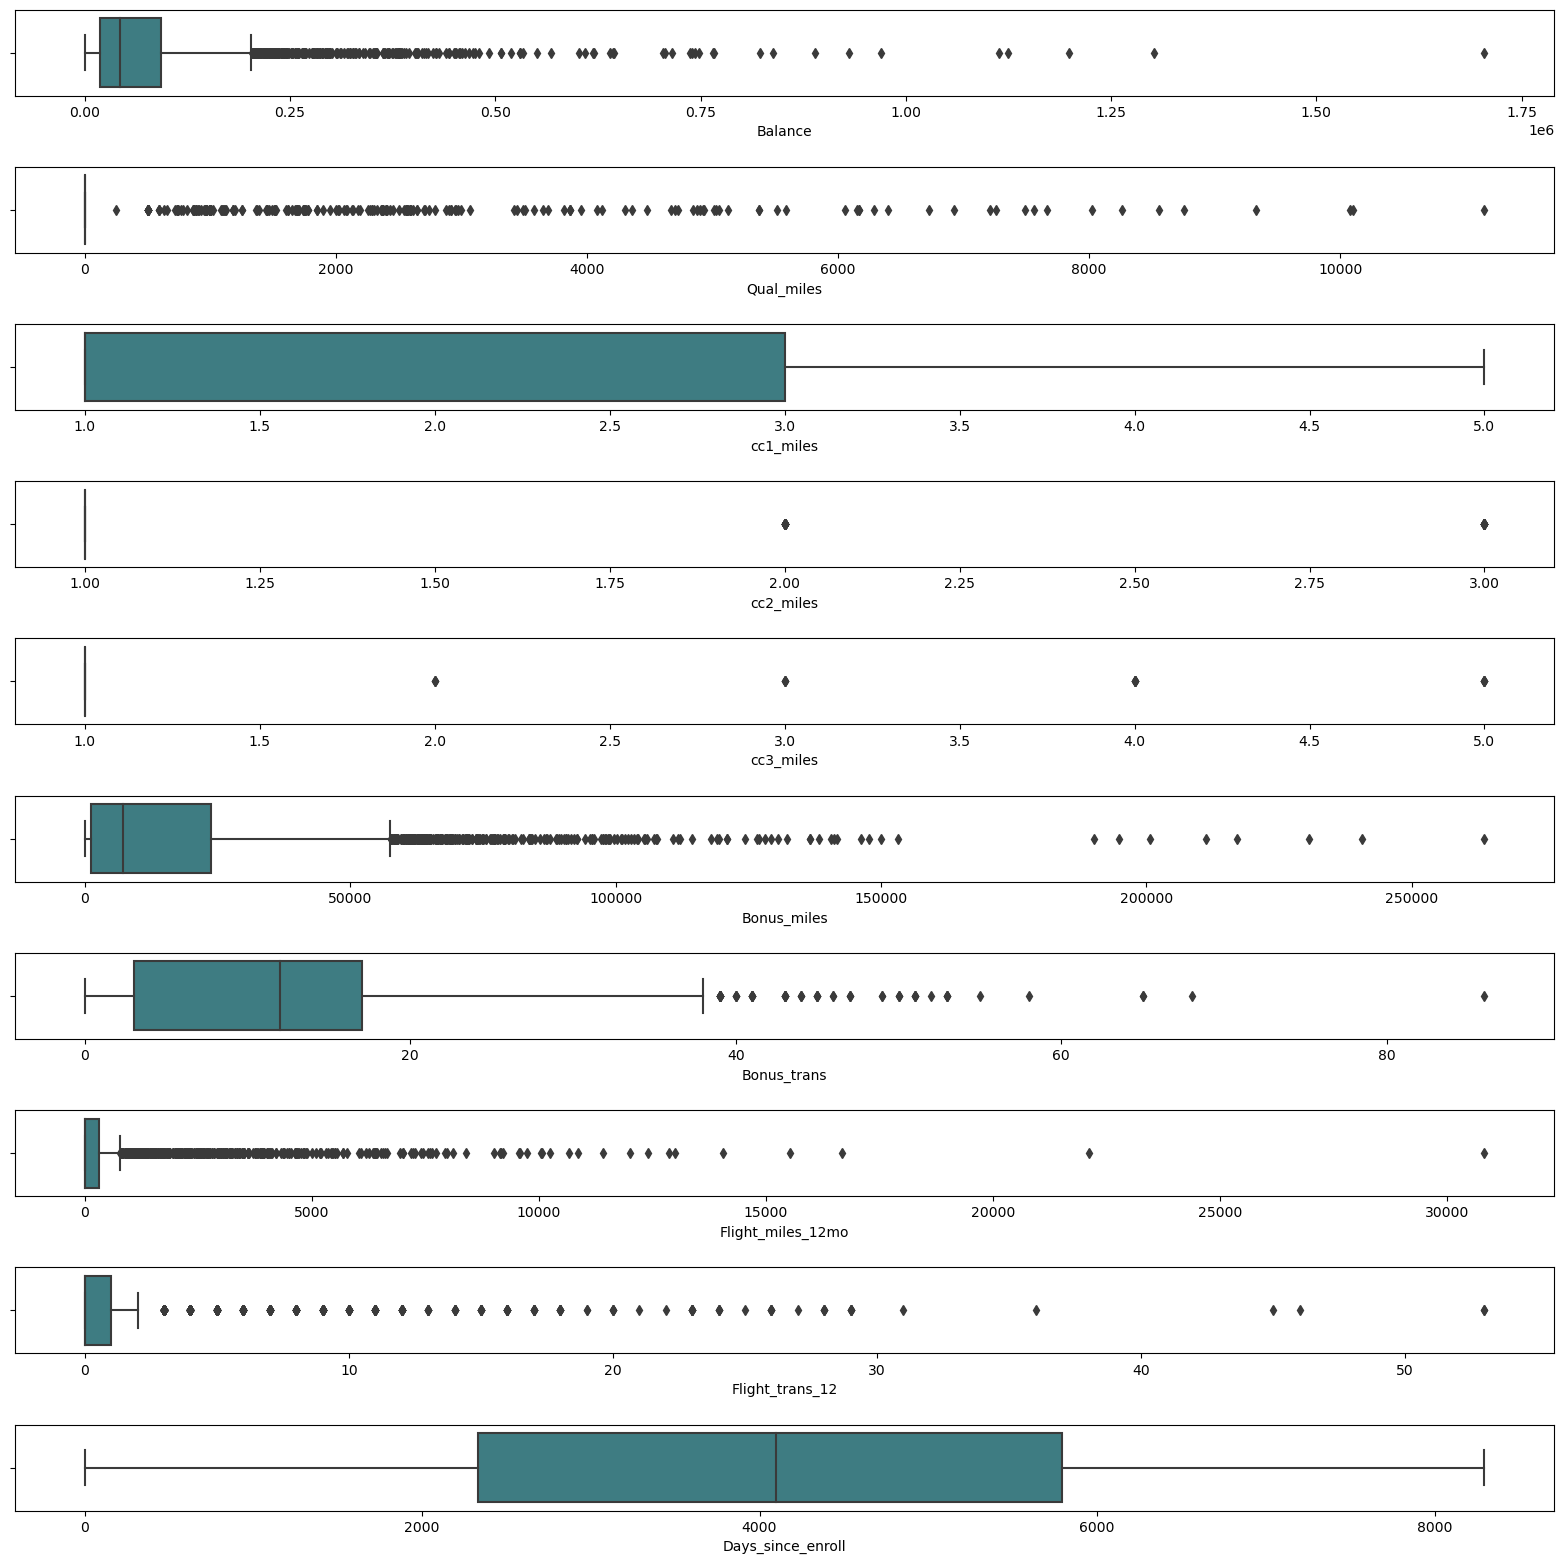

In [16]:
#outlier visualization
fig,axes=plt.subplots(10,1,figsize=(16,16),sharex=False,sharey=False)
sns.boxplot(x='Balance',data=Airline_data,palette='crest',ax=axes[0])
sns.boxplot(x='Qual_miles',data=Airline_data,palette='crest',ax=axes[1])
sns.boxplot(x='cc1_miles',data=Airline_data,palette='crest',ax=axes[2])
sns.boxplot(x='cc2_miles',data=Airline_data,palette='crest',ax=axes[3])
sns.boxplot(x='cc3_miles',data=Airline_data,palette='crest',ax=axes[4])
sns.boxplot(x='Bonus_miles',data=Airline_data,palette='crest',ax=axes[5])
sns.boxplot(x='Bonus_trans',data=Airline_data,palette='crest',ax=axes[6])
sns.boxplot(x='Flight_miles_12mo',data=Airline_data,palette='crest',ax=axes[7])
sns.boxplot(x='Flight_trans_12',data=Airline_data,palette='crest',ax=axes[8])
sns.boxplot(x='Days_since_enroll',data=Airline_data,palette='crest',ax=axes[9])
plt.tight_layout(pad=2.0)

In [17]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.metrics import silhouette_score,completeness_score

In [18]:
#Standardization
scaler=StandardScaler()
scaled_data=scaler.fit_transform(Airline_data)
scaled_data

array([[-4.51140783e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.39545434e+00, -7.66919299e-01],
       [-5.39456874e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.37995704e+00, -7.66919299e-01],
       [-3.20031232e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.41192021e+00, -7.66919299e-01],
       ...,
       [-4.29480975e-05, -1.86298687e-01,  6.83121167e-01, ...,
        -3.62167870e-01, -1.31560393e+00,  1.30391816e+00],
       [-1.85606976e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -9.85033311e-02, -1.31608822e+00, -7.66919299e-01],
       [-7.00507951e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01, -1.31754109e+00, -7.66919299e-01]])

##### 1) KMean Clustering

In [19]:
#Building a rough model by taking any k-value
model=KMeans(n_clusters=2,random_state=42)
model.fit(scaled_data)

KMeans(n_clusters=2, random_state=42)

In [20]:
model.labels_

array([1, 1, 1, ..., 1, 1, 1])

In [21]:
model.inertia_

35409.51662986132

In [22]:
wcss=[]
for i in range(1,11):
    model=KMeans(n_clusters=i,random_state=42)
    model.fit(scaled_data)
    wcss.append(model.inertia_)

In [23]:
wcss

[43989.000000000015,
 35409.51662986132,
 30899.21640879058,
 27162.166106124132,
 23707.16388481562,
 21089.756870023873,
 19166.389043789353,
 17316.725861419523,
 15960.406001471112,
 14732.229882347434]

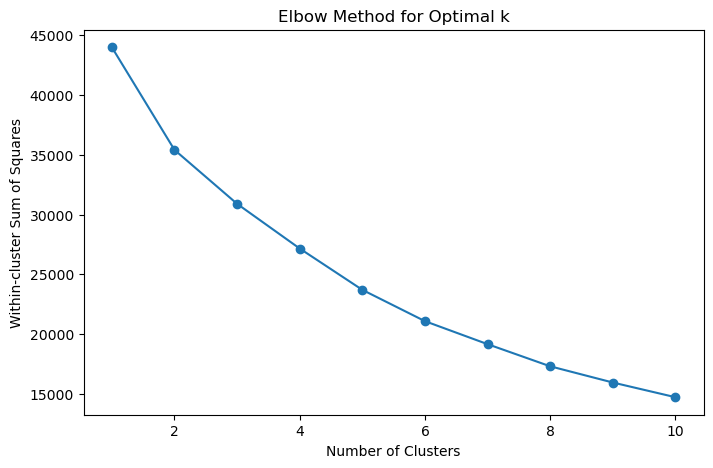

In [24]:
#plotting elbow plot
plt.figure(figsize=(8,5))
plt.plot(range(1,11),wcss,marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-cluster Sum of Squares')
plt.title('Elbow Method for Optimal k')
plt.show()

There is no clear "elbow" visible. A choice of 2 or 3 clusters seems to be fair. Let's build the model & see the silhouette score.

In [25]:
#Building the model with n_cluster=2
model_1=KMeans(n_clusters=2,random_state=42)
model_1.fit(scaled_data)
labels=model_1.labels_

In [26]:
Airline_Data=Airline_data.copy()

In [27]:
labels

array([1, 1, 1, ..., 1, 1, 1])

In [28]:
model_1.cluster_centers_

array([[ 0.58716103,  0.1467053 ,  1.1262893 , -0.03066175,  0.1259372 ,
         1.00495046,  0.91396585,  0.36236117,  0.40332941,  0.3977003 ,
         0.69999012],
       [-0.28377998, -0.07090394, -0.54434531,  0.01481909, -0.06086653,
        -0.48570121, -0.44172756, -0.17513227, -0.19493257, -0.19221198,
        -0.33831125]])

In [29]:
Airline_data['Labels']=labels
Airline_data

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,Labels
ID,,,,,,,,,,,,
1,28143,0,1,1,1,174,1,0,0,7000,0,1
2,19244,0,1,1,1,215,2,0,0,6968,0,1
3,41354,0,1,1,1,4123,4,0,0,7034,0,1
4,14776,0,1,1,1,500,1,0,0,6952,0,1
5,97752,0,4,1,1,43300,26,2077,4,6935,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4017,18476,0,1,1,1,8525,4,200,1,1403,1,1
4018,64385,0,1,1,1,981,5,0,0,1395,1,1
4019,73597,0,3,1,1,25447,8,0,0,1402,1,1


In [30]:
AirData['Labels']=labels
AirData.head(2)

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,Labels
0,1,28143,0,1,1,1,174,1,0,0,7000,0,1
1,2,19244,0,1,1,1,215,2,0,0,6968,0,1


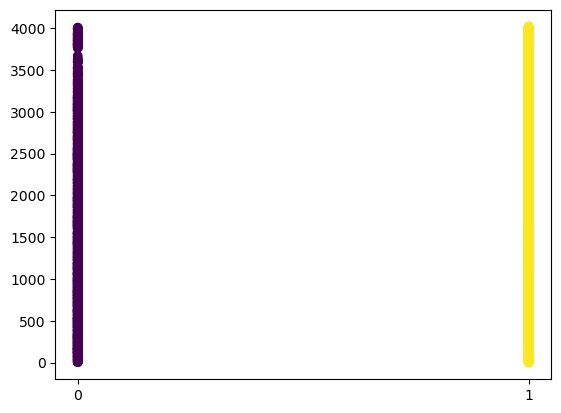

In [31]:
plt.scatter(Airline_data['Labels'],Airline_data.index,c=labels,cmap='viridis')
plt.xticks([0,1])
plt.show()

In [32]:
grp=Airline_data.groupby(['Labels'])
grp

In [33]:
for x,y in grp:
    print(y)
    print('_________________________________________________________________________')

      Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
ID                                                                        
5       97752           0          4          1          1        43300   
7       84914           0          3          1          1        27482   
9      443003           0          3          2          1         1753   
10     104860           0          3          1          1        28426   
12      96522           0          5          1          1        61105   
...       ...         ...        ...        ...        ...          ...   
3989    91605           0          4          1          1        37840   
3996    72297           0          3          1          1        16241   
3997    58387           0          3          1          1        14581   
4002    57793           0          3          1          1        20959   
4008    59017           0          4          1          1        34746   

      Bonus_trans  Fligh

In [34]:
grp.agg(['mean','min','max'])

Balance                Qual_miles            cc1_miles          \
                 mean  min      max        mean min    max      mean min max   
Labels                                                                         
0       132760.658986  231  1704838  257.798771   0  11148  3.610599   1   5   
1        45041.650352    0   456509   89.232481   0  10074  1.310716   1   4   

       cc2_miles  ... Flight_miles_12mo Flight_trans_12          \
            mean  ...               max            mean min max   
Labels            ...                                             
0       1.009985  ...             30817        2.902458   0  53   
1       1.016685  ...              9577        0.635521   0  16   

       Days_since_enroll                Award          
                    mean  min   max      mean min max  
Labels                                                 
0            4942.417819  486  8296  0.708909   0   1  
1            3720.834631    2  8296  0.206897   0   1  

[2 rows x 33 columns]

In [35]:
#Evaluate the model
silhouette_score(Airline_data.iloc[:,0:11],labels)

0.34333332585159393

In [36]:
#Building the model with n_cluster=3
model_2=KMeans(n_clusters=3,random_state=42)
model_2.fit(scaled_data)
labels=model_2.labels_

In [37]:
Airline_Data['Labels']=labels
Airline_Data

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,Labels
ID,,,,,,,,,,,,
1,28143,0,1,1,1,174,1,0,0,7000,0,2
2,19244,0,1,1,1,215,2,0,0,6968,0,2
3,41354,0,1,1,1,4123,4,0,0,7034,0,2
4,14776,0,1,1,1,500,1,0,0,6952,0,2
5,97752,0,4,1,1,43300,26,2077,4,6935,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4017,18476,0,1,1,1,8525,4,200,1,1403,1,2
4018,64385,0,1,1,1,981,5,0,0,1395,1,2
4019,73597,0,3,1,1,25447,8,0,0,1402,1,0


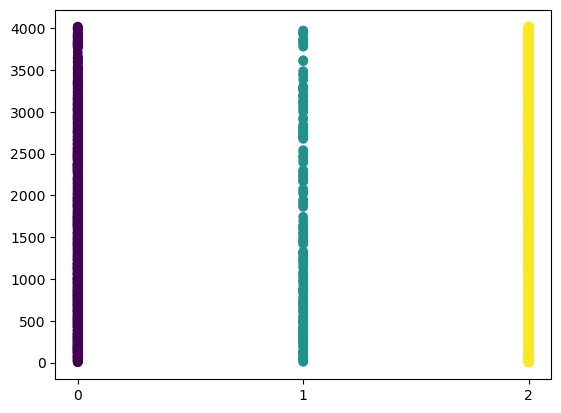

In [38]:
plt.scatter(Airline_Data['Labels'],Airline_Data.index,c=labels,cmap='viridis')
plt.xticks([0,1,2])
plt.show()

In [39]:
grp=Airline_Data.groupby(['Labels'])
grp

In [40]:
for x,y in grp:
    print(y)
    print('_________________________________________________________________________')

      Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
ID                                                                        
5       97752           0          4          1          1        43300   
7       84914           0          3          1          1        27482   
10     104860           0          3          1          1        28426   
12      96522           0          5          1          1        61105   
16      28495           0          4          1          1        49442   
...       ...         ...        ...        ...        ...          ...   
4002    57793           0          3          1          1        20959   
4003    28867           0          3          1          1        19169   
4008    59017           0          4          1          1        34746   
4014    39142           0          3          1          1        14981   
4019    73597           0          3          1          1        25447   

      Bonus_trans  Fligh

In [41]:
grp.agg(['mean','min','max'])

Balance                Qual_miles            cc1_miles          \
                 mean  min      max        mean min    max      mean min max   
Labels                                                                         
0       116978.705322  329  1125076  156.820492   0  11148  3.731533   1   5   
1       197873.367470  231  1704838  780.891566   0  10098  2.150602   1   5   
2        44370.062160    0   456509   96.833333   0  10074  1.235820   1   3   

       cc2_miles  ... Flight_miles_12mo Flight_trans_12          \
            mean  ...               max            mean min max   
Labels            ...                                             
0       1.002383  ...              4130        1.011914   0  10   
1       1.036145  ...             30817       15.704819   1  53   
2       1.019037  ...              5446        0.626263   0  11   

       Days_since_enroll                Award          
                    mean  min   max      mean min max  
Labels                                                 
0            4884.591739  486  8296  0.652899   0   1  
1            4730.018072  890  8296  0.807229   0   1  
2            3704.442502    2  8296  0.203963   0   1  

[3 rows x 33 columns]

In [42]:
#Evaluate the model
silhouette_score(Airline_Data.iloc[:,0:11],labels)

0.2884087946458739

###### Inference
By evaluating the model using silhouette score,we find out that,the ideal number of cluster is 2,with a score of 0.34,which is somewhat close to 1.

In [43]:
#pip install yellowbrick

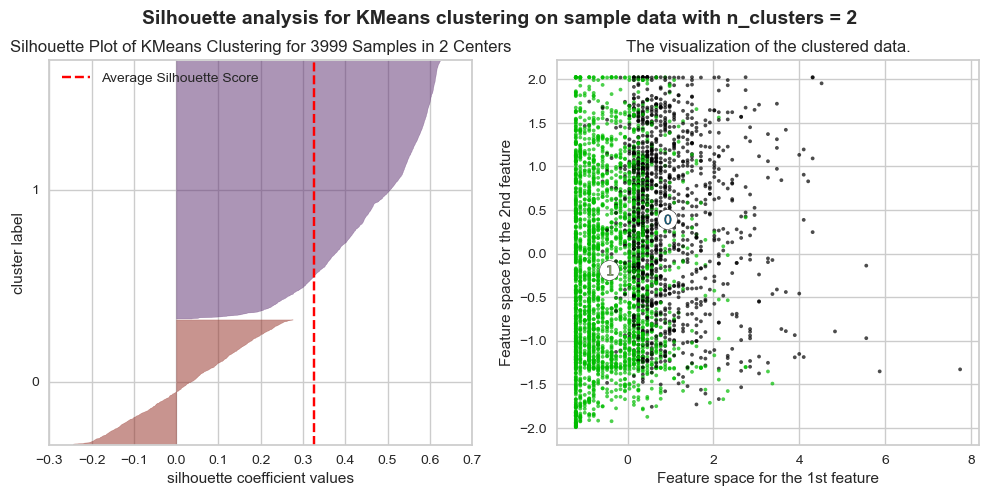

In [44]:
from yellowbrick.cluster import SilhouetteVisualizer

fig,(ax1,ax2)=plt.subplots(1,2,sharey=False)
fig.set_size_inches(12,5)
sil_visualizer1=SilhouetteVisualizer(model_1,ax= ax1,colors=['#922B21','#5B2C6F','#1B4F72','#32a84a'])
sil_visualizer1.fit(scaled_data)

# 2nd Plot showing the actual clusters formed

import matplotlib.cm as cm
colors1=cm.nipy_spectral(model_1.labels_.astype(float)/2) # 2 is number of clusters
ax2.scatter(scaled_data[:, 6],scaled_data[:, 9],marker='.',s=30,lw=0,alpha=0.7,c=colors1,edgecolor='k')

# Labeling the clusters
centers1=model_1.cluster_centers_
# Draw white circles at cluster centers
ax2.scatter(centers1[:, 6],centers1[:, 9],marker='o',c="white",alpha=1,s=200,edgecolor='k')

for i,c in enumerate(centers1):
    ax2.scatter(c[6],c[9],marker='$%d$' % i,alpha=1,s=50,edgecolor='k')

ax2.set_title(label="The visualization of the clustered data.")
ax2.set_xlabel("Feature space for the 1st feature")
ax2.set_ylabel("Feature space for the 2nd feature")

plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
              "with n_clusters = %d" % 2),fontsize=14, fontweight='bold')

sil_visualizer1.show()
plt.show()

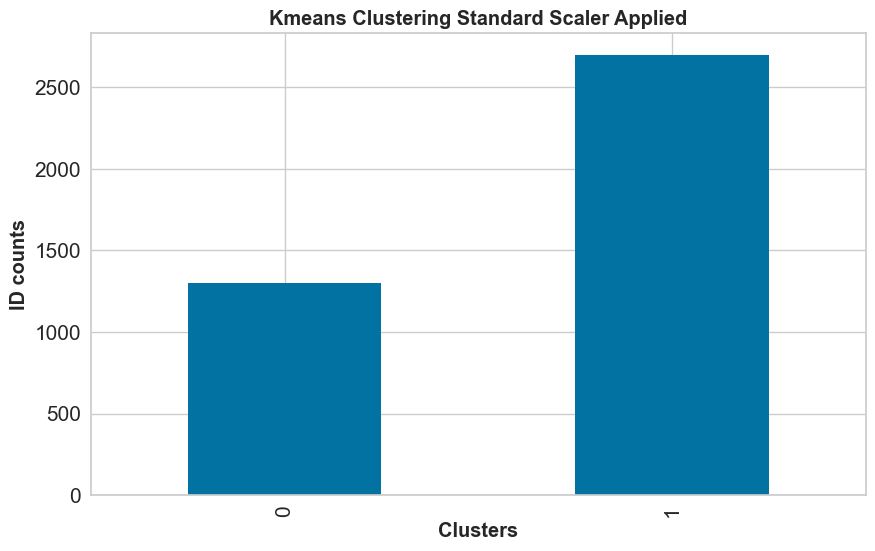

In [45]:
# Plotting barplot using groupby method to get visualize how many row no. in each cluster
fig,ax=plt.subplots(figsize=(10,6))
AirData.groupby(['Labels']).count()['ID'].plot(kind='bar')
plt.ylabel('ID Counts')
plt.title('Kmeans Clustering Standard Scaler Applied',fontsize='large',fontweight='bold')
ax.set_xlabel('Clusters',fontsize='large',fontweight='bold')
ax.set_ylabel('ID counts',fontsize='large',fontweight='bold')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.show()

In [46]:
# Group data by Clusters (K=2)
AirData.groupby('Labels').agg(['mean'])

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
Labels,,,,,,,,,,,,
0,1573.023041,132760.658986,257.798771,3.610599,1.009985,1.036866,41429.117512,20.380952,967.233487,2.902458,4942.417819,0.708909
1,2228.100482,45041.650352,89.232481,1.310716,1.016685,1.000371,5421.404894,7.363737,215.211346,0.635521,3720.834631,0.206897


We can now clearly see the 2 number of clusters formed, which can be described as under:
+ Cluster1, Tier 1 = "1" = Defines the group of fliers that earn the most out of the card and are frequent fliers
+ Cluster0, Tier 2 = "0" = Defines the group of fliers that earn the least and are the least frequent fliers

###############################################################################################################################

##### 2) Hierarchical Clustering

In [47]:
AirlineEW_data=pd.read_excel(r'C:\Users\Linta Stephen\Downloads\ExcelR\Assignments\7.Clustering\EastWestAirlines.xlsx',sheet_name='data')
#Renaming some columns
AirlineEW_data.rename(columns={'ID#':'ID','Award?':'Award'},inplace=True)

EastWestAirData=AirlineEW_data.copy()

#Setting 'ID' as index column
AirlineEW_data.set_index('ID',inplace=True)
AirlineEW_data.head(3)

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
ID,,,,,,,,,,,
1,28143,0,1,1,1,174,1,0,0,7000,0
2,19244,0,1,1,1,215,2,0,0,6968,0
3,41354,0,1,1,1,4123,4,0,0,7034,0


In [48]:
EWData=AirlineEW_data.copy()

In [49]:
#Normalization
scaler=MinMaxScaler()
scaled_Airdata=scaler.fit_transform(AirlineEW_data)
scaled_Airdata

array([[0.01650773, 0.        , 0.        , ..., 0.        , 0.84374246,
        0.        ],
       [0.01128788, 0.        , 0.        , ..., 0.        , 0.83988425,
        0.        ],
       [0.02425685, 0.        , 0.        , ..., 0.        , 0.84784181,
        0.        ],
       ...,
       [0.0431695 , 0.        , 0.5       , ..., 0.        , 0.16879672,
        1.        ],
       [0.03220189, 0.        , 0.        , ..., 0.01886792, 0.16867615,
        0.        ],
       [0.00176908, 0.        , 0.        , ..., 0.        , 0.16831444,
        0.        ]])

In [51]:
import scipy.cluster.hierarchy as sch

+ Applying Dendrogram on data.
+ Here diffrent linkage method from hyperparameter is used to see difference between methods for understanding.
+ Ward method is commonly used since it is simpler to visualize understanding.
+ Find number of cluster's using color coding of dendrogram. Each color indicates one cluster.

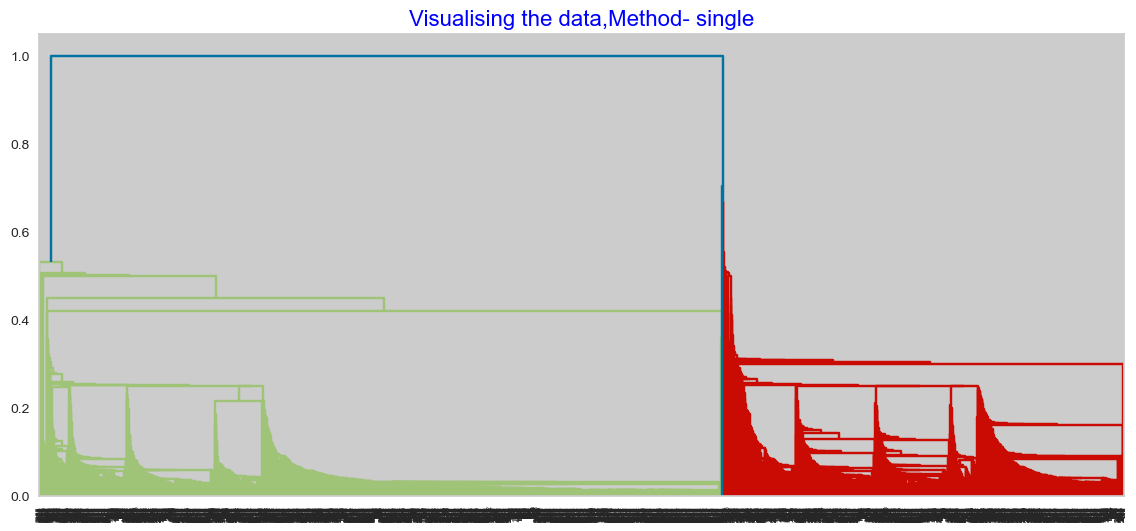

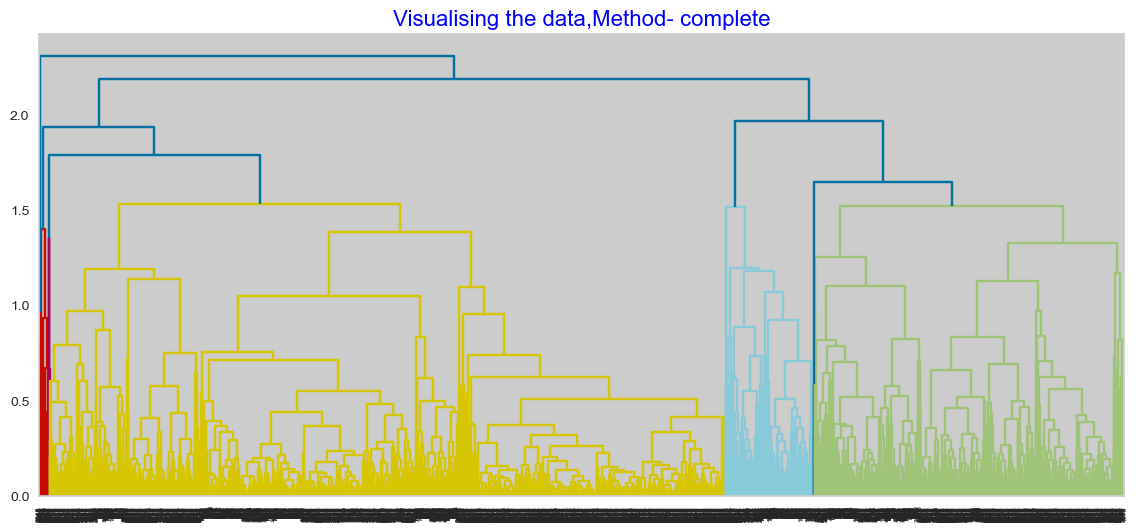

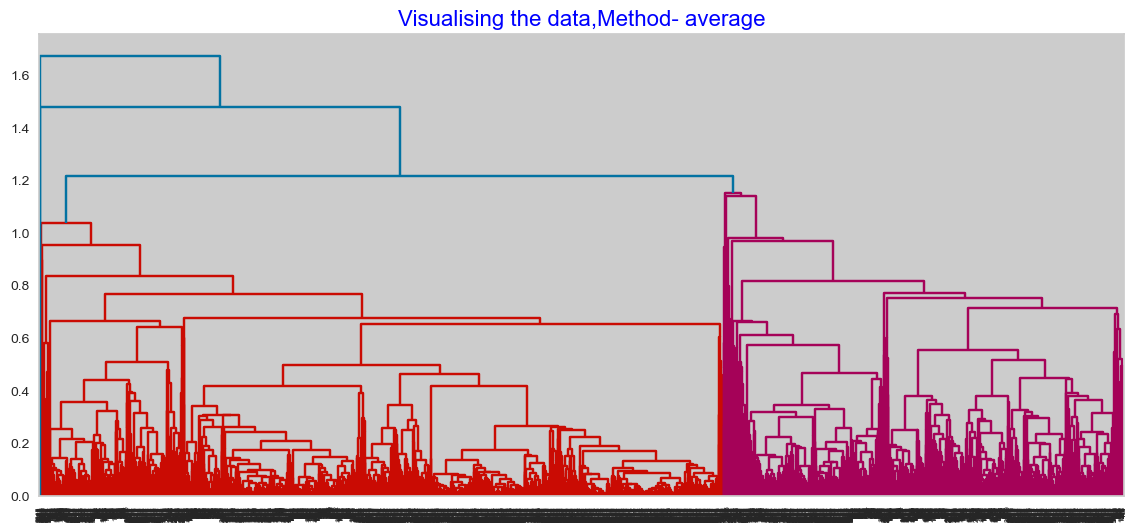

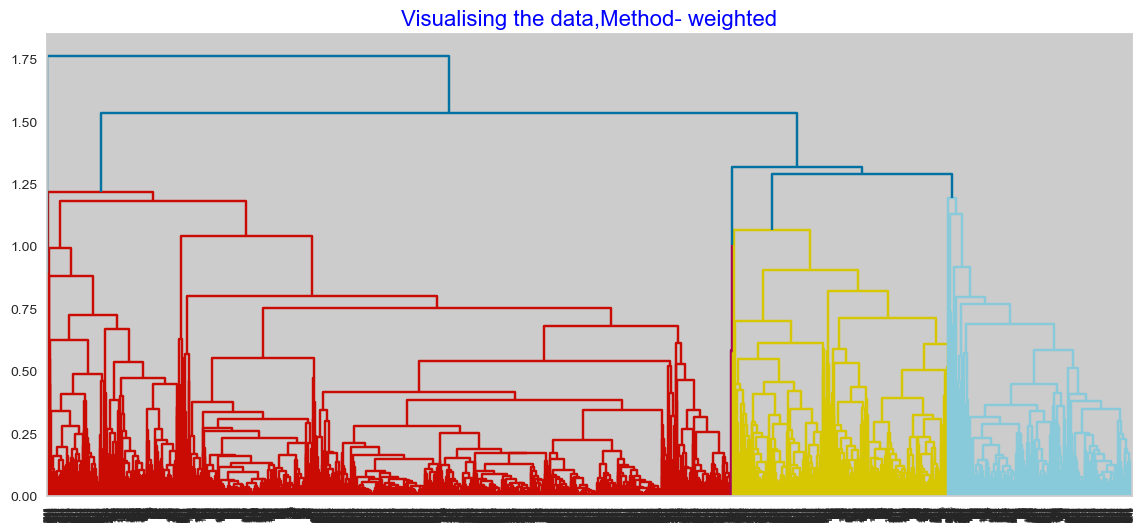

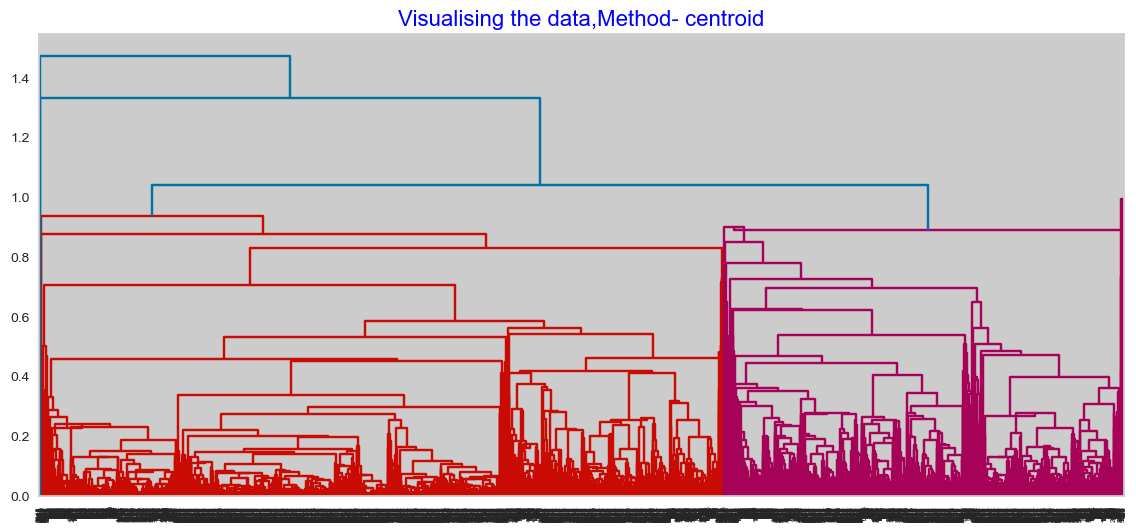

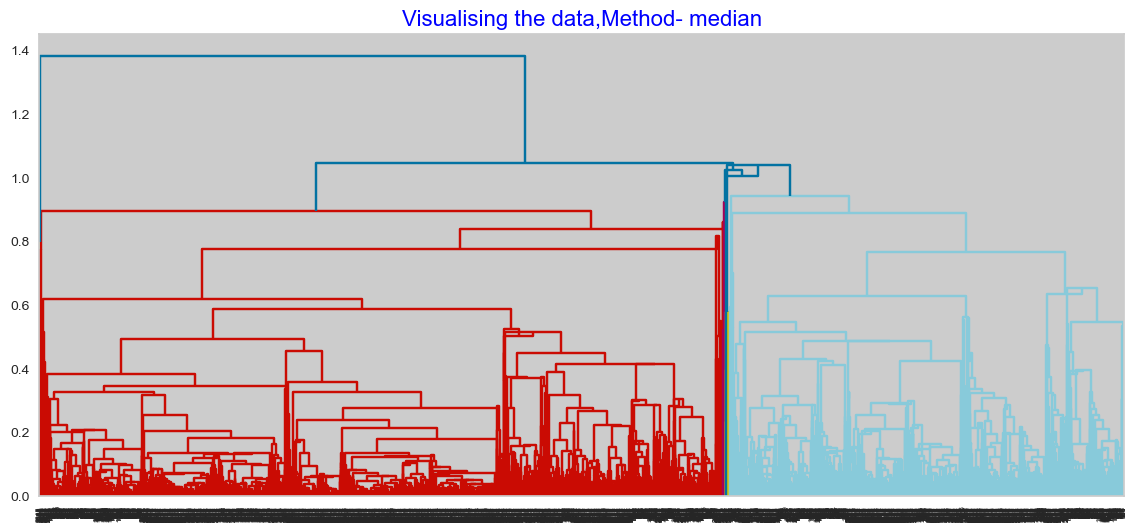

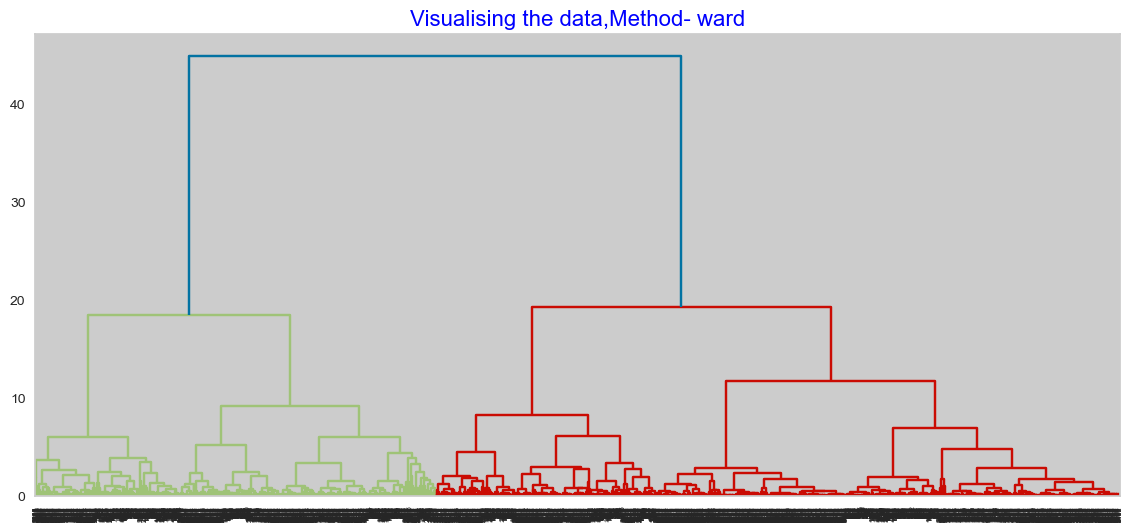

In [52]:
for methods in ['single','complete','average','weighted','centroid','median','ward']: 
    plt.figure(figsize=(14,6))    
    dict={'fontsize':16,'fontweight' :14, 'color' : 'blue'}    
    plt.title('Visualising the data,Method- {}'.format(methods),fontdict=dict) 
    Dendrogram1=sch.dendrogram(sch.linkage(scaled_Airdata,method=methods,optimal_ordering=False))

In [54]:
from sklearn.cluster import AgglomerativeClustering

In [55]:
n_clusters=[2,3,4,5,6,7,8]  # always start number from 2.

for n_clusters in n_clusters:
    for linkages in ["ward", "complete", "average", "single"]:
        hie_cluster1=AgglomerativeClustering(n_clusters=n_clusters,linkage=linkages) # bydefault it takes linkage 'ward'
        hie_labels1=hie_cluster1.fit_predict(scaled_Airdata)
        silhouette_score1=silhouette_score(scaled_Airdata,hie_labels1)
        print("For n_clusters =", n_clusters,"The average silhouette_score with linkage-",linkages, ':',silhouette_score1)
    print()

For n_clusters = 2 The average silhouette_score with linkage- ward : 0.535930510919477
For n_clusters = 2 The average silhouette_score with linkage- complete : 0.47040913679492186
For n_clusters = 2 The average silhouette_score with linkage- average : 0.47040913679492186
For n_clusters = 2 The average silhouette_score with linkage- single : 0.535930510919477

For n_clusters = 3 The average silhouette_score with linkage- ward : 0.43550164891825044
For n_clusters = 3 The average silhouette_score with linkage- complete : 0.5318787367232326
For n_clusters = 3 The average silhouette_score with linkage- average : 0.39619766243707655
For n_clusters = 3 The average silhouette_score with linkage- single : 0.5351606918177734

For n_clusters = 4 The average silhouette_score with linkage- ward : 0.42494300944261365
For n_clusters = 4 The average silhouette_score with linkage- complete : 0.46459708515197673
For n_clusters = 4 The average silhouette_score with linkage- average : 0.5286018409871408
F

The seperation in Ward Method indicate that 2 is the optimal number for clusters.

In [56]:
model=AgglomerativeClustering(n_clusters=2,affinity='euclidean',linkage='ward')
model.fit(scaled_Airdata)

AgglomerativeClustering()

In [57]:
labels=model.labels_
labels

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [58]:
AirlineEW_data['Labels']=labels
AirlineEW_data.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,Labels
ID,,,,,,,,,,,,
1,28143,0,1,1,1,174,1,0,0,7000,0,0
2,19244,0,1,1,1,215,2,0,0,6968,0,0
3,41354,0,1,1,1,4123,4,0,0,7034,0,0
4,14776,0,1,1,1,500,1,0,0,6952,0,0
5,97752,0,4,1,1,43300,26,2077,4,6935,1,1


In [64]:
EastWestAirData['Labels']=labels

In [59]:
grp=AirlineEW_data.groupby(AirlineEW_data['Labels'])
grp

In [60]:
for x,y in grp:
    print(y)
    print("_____________________________________________________________________")

      Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
ID                                                                        
1       28143           0          1          1          1          174   
2       19244           0          1          1          1          215   
3       41354           0          1          1          1         4123   
4       14776           0          1          1          1          500   
6       16420           0          1          1          1            0   
...       ...         ...        ...        ...        ...          ...   
4014    39142           0          3          1          1        14981   
4015    11181           0          1          1          1          929   
4016     3974           0          1          1          1          365   
4020    54899           0          1          1          1          500   
4021     3016           0          1          1          1            0   

      Bonus_trans  Fligh

In [61]:
grp.agg(['mean'])

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
Labels,,,,,,,,,,,
0,59807.839555,87.602462,1.705322,1.01390,1.008737,10227.689039,9.142971,226.292295,0.652502,3820.652105,0.0
1,97053.051317,240.196489,2.661715,1.01553,1.018231,28905.414585,15.782579,857.501013,2.599595,4625.062120,1.0


In [63]:
#evaluating the model
(silhouette_score(scaled_Airdata,model.labels_)*100).round(3)

53.593

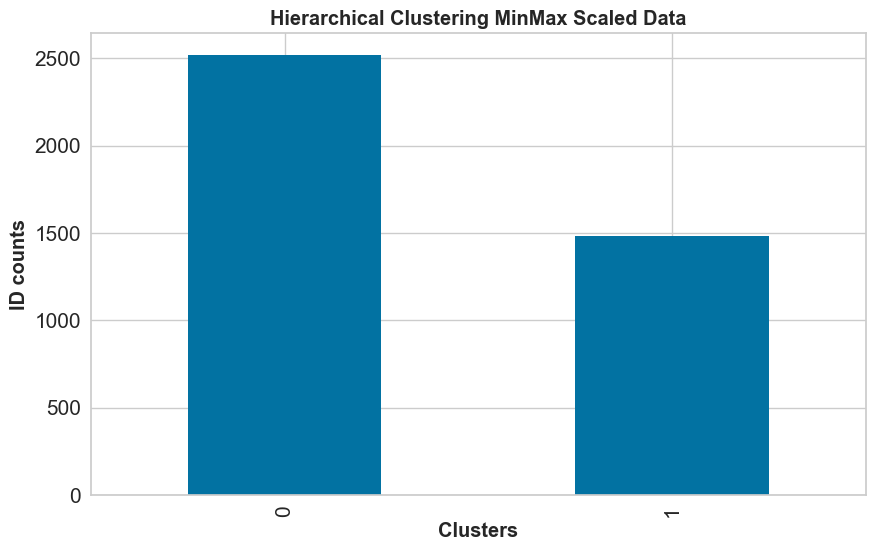

In [65]:
# Plotting barplot using groupby method to get visualize how many row no. in each cluster

fig, ax=plt.subplots(figsize=(10,6))
EastWestAirData.groupby(['Labels']).count()['ID'].plot(kind='bar')
plt.ylabel('ID Counts')
plt.title('Hierarchical Clustering MinMax Scaled Data',fontsize='large',fontweight='bold')
ax.set_xlabel('Clusters',fontsize='large',fontweight='bold')
ax.set_ylabel('ID counts',fontsize='large',fontweight='bold')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.show()

###############################################################################################################################

##### 3)  DBSCAN - (Density Based Spatial Clustering of Applications with Noise)

In [66]:
data=pd.read_excel(r'C:\Users\Linta Stephen\Downloads\ExcelR\Assignments\7.Clustering\EastWestAirlines.xlsx',sheet_name='data')
#Renaming some columns
data.rename(columns={'ID#':'ID','Award?':'Award'},inplace=True)

Data=data.copy()

#Setting 'ID' as index column
data.set_index('ID',inplace=True)
data.head(3)

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
ID,,,,,,,,,,,
1,28143,0,1,1,1,174,1,0,0,7000,0
2,19244,0,1,1,1,215,2,0,0,6968,0
3,41354,0,1,1,1,4123,4,0,0,7034,0


In [67]:
#Normalization
scaler=MinMaxScaler()
scaled_EWdata=scaler.fit_transform(data)
scaled_EWdata

array([[0.01650773, 0.        , 0.        , ..., 0.        , 0.84374246,
        0.        ],
       [0.01128788, 0.        , 0.        , ..., 0.        , 0.83988425,
        0.        ],
       [0.02425685, 0.        , 0.        , ..., 0.        , 0.84784181,
        0.        ],
       ...,
       [0.0431695 , 0.        , 0.5       , ..., 0.        , 0.16879672,
        1.        ],
       [0.03220189, 0.        , 0.        , ..., 0.01886792, 0.16867615,
        0.        ],
       [0.00176908, 0.        , 0.        , ..., 0.        , 0.16831444,
        0.        ]])

To choose the best combination of the algorithm parameters we'll first create a matrix of investigated combinations.

In [68]:
from itertools import product

eps_values=np.arange(0.25,1.25,0.25) # eps values to be investigated
min_samples=np.arange(3,23) # min_samples values to be investigated
DBSCAN_params=list(product(eps_values, min_samples))

In [70]:
from sklearn.cluster import DBSCAN

In [71]:
no_of_clusters=[]
sil_score=[]

for p in DBSCAN_params:
    DBS_clustering=DBSCAN(eps=p[0],min_samples=p[1]).fit(scaled_EWdata)
    no_of_clusters.append(len(np.unique(DBS_clustering.labels_)))
    sil_score.append(silhouette_score(scaled_EWdata, DBS_clustering.labels_))

A heatplot below shows how many clusters were genreated by the algorithm for the respective parameters combinations.


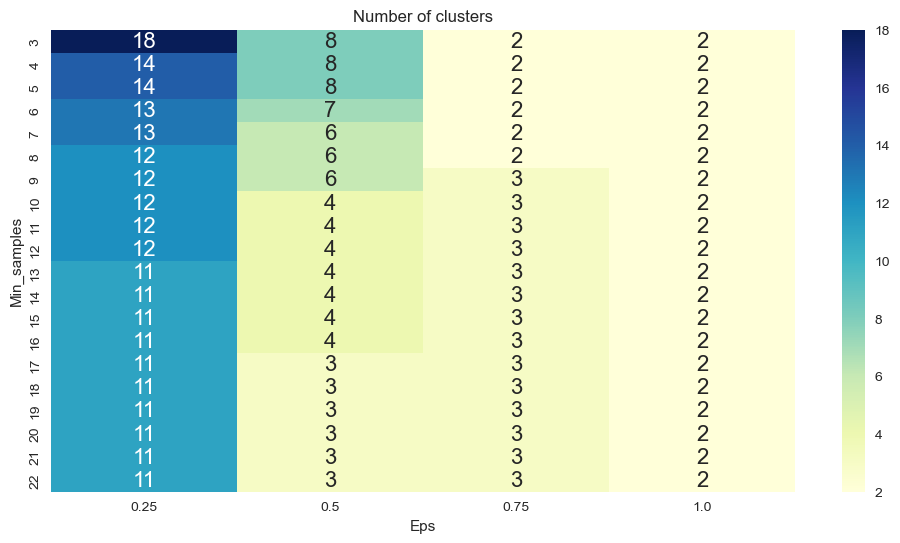

In [72]:
#Collecting number of generated clusters.
tmp=pd.DataFrame.from_records(DBSCAN_params,columns=['Eps','Min_samples'])   
tmp['No_of_clusters']=no_of_clusters

pivot_1=pd.pivot_table(tmp,values='No_of_clusters',index='Min_samples',columns='Eps')

fig,ax=plt.subplots(figsize=(12,6))
sns.heatmap(pivot_1,annot=True,annot_kws={"size": 16},cmap="YlGnBu",ax=ax)
ax.set_title('Number of clusters')
print('A heatplot below shows how many clusters were genreated by the algorithm for the respective parameters combinations.')
plt.show()

The heatmap shows, the number of clusters vary from 18 to 2.

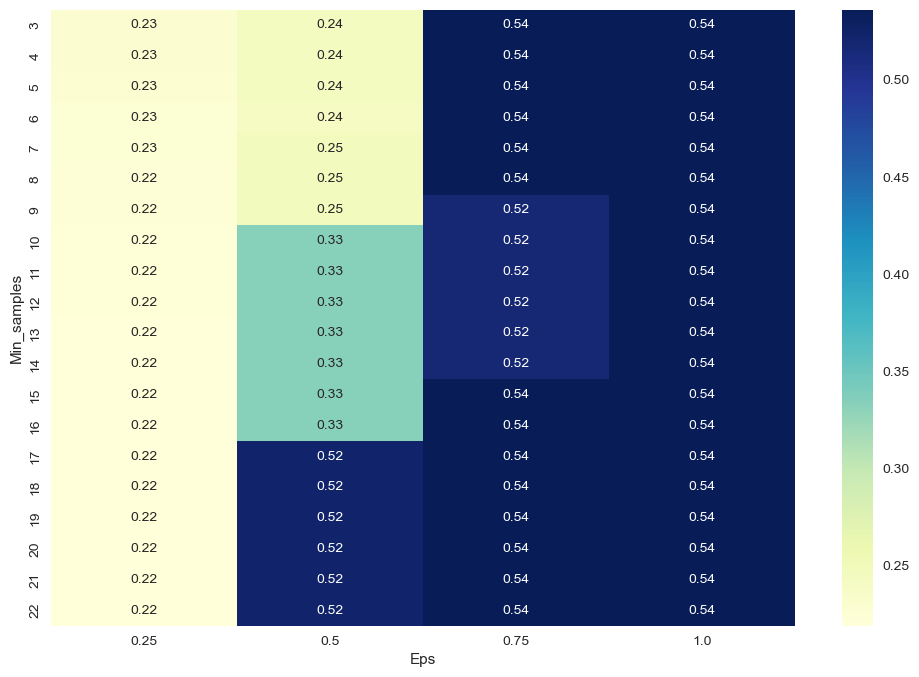

In [73]:
tmp=pd.DataFrame.from_records(DBSCAN_params,columns=['Eps','Min_samples'])   
tmp['Sil_score']=sil_score
pivot_1=pd.pivot_table(tmp,values='Sil_score',index='Min_samples',columns='Eps')

fig,ax=plt.subplots(figsize=(12,8))
sns.heatmap(pivot_1,annot=True,annot_kws={"size": 10},cmap="YlGnBu",ax=ax)
plt.show()

Global maximum is 0.54 for eps=1.0 and min_samples=from 22 to 3

In [74]:
epsilon=[0.25,0.5,0.75,1]
min_samples=[11,12,13,14,15,16,17,18,19,20,21,22]
sil_avg=[]
max_value=[0,0,0,0]

for i in range(len(epsilon)):
    for j in range(len(min_samples)):

        db=DBSCAN(min_samples=min_samples[j],eps=epsilon[i]).fit(scaled_EWdata) 
        core_samples_mask=np.zeros_like(db.labels_,dtype=bool)
        core_samples_mask[db.core_sample_indices_]=True
        labels=db.labels_

        # Number of clusters in labels, ignoring noise if present.
        n_clusters_=len(set(labels))-(1 if -1 in labels else 0)
        n_noise_=list(labels).count(-1)

        silhouette_avg=silhouette_score(scaled_EWdata,labels)
        if silhouette_avg>max_value[3]:
            max_value=(epsilon[i],min_samples[j],n_clusters_,silhouette_avg)
        sil_avg.append(silhouette_avg)

print("epsilon=",max_value[0], 
      "\nmin_sample=",max_value[1],
      "\nnumber of clusters=",max_value[2],
      "\naverage silhouette score= %.4f" % max_value[3])

epsilon= 1 
min_sample= 11 
number of clusters= 2 
average silhouette score= 0.5359


In [75]:
epsilon=[0.25,0.5,0.75,1]
min_samples=[3,4,5,6,7,8,9,10,11]
sil_avg=[]
max_value=[0,0,0,0]

for i in range(len(epsilon)):
    for j in range(len(min_samples)):

        db=DBSCAN(min_samples=min_samples[j],eps=epsilon[i]).fit(scaled_EWdata)
        core_samples_mask=np.zeros_like(db.labels_,dtype=bool)
        core_samples_mask[db.core_sample_indices_]=True
        labels=db.labels_

        # Number of clusters in labels, ignoring noise if present.
        n_clusters_=len(set(labels))-(1 if -1 in labels else 0)
        n_noise_=list(labels).count(-1)

        silhouette_avg=silhouette_score(scaled_EWdata,labels)
        if silhouette_avg>max_value[3]:
            max_value=(epsilon[i],min_samples[j],n_clusters_,silhouette_avg)
        sil_avg.append(silhouette_avg)

print("epsilon=",max_value[0], 
      "\nmin_sample=",max_value[1],
      "\nnumber of clusters=",max_value[2],
      "\naverage silhouette score= %.4f" % max_value[3])

epsilon= 0.75 
min_sample= 3 
number of clusters= 2 
average silhouette score= 0.5359


In [76]:
#Run DBSCAN on MinMax Scaled data with optimal min_sample and epsilon values
dbscan=DBSCAN(eps=1,min_samples=22) # min_samples = number of clumns * 3
dbscan.fit(scaled_EWdata)

DBSCAN(eps=1, min_samples=22)

In [78]:
data['Labels']=dbscan.labels_

In [77]:
Data['Labels']=dbscan.labels_
Data.head()

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,Labels
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,1


In [79]:
data.groupby('Labels').agg(['mean'])

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
Labels,,,,,,,,,,,
0,59807.839555,87.602462,1.705322,1.01390,1.008737,10227.689039,9.142971,226.292295,0.652502,3820.652105,0.0
1,97053.051317,240.196489,2.661715,1.01553,1.018231,28905.414585,15.782579,857.501013,2.599595,4625.062120,1.0


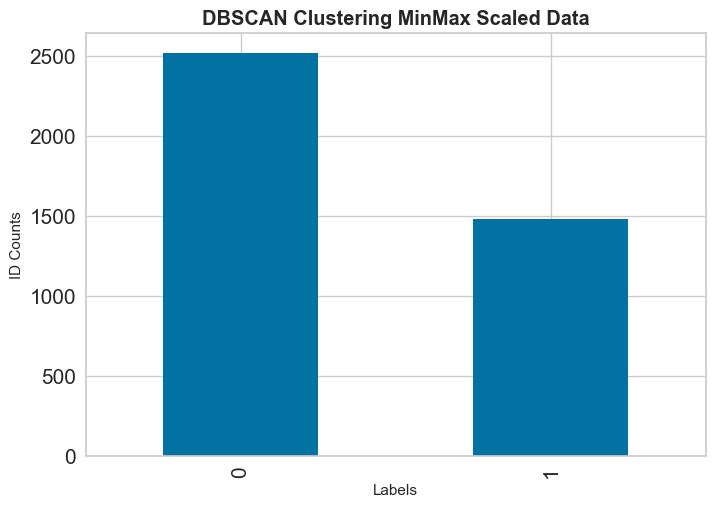

In [80]:
#Plotting barplot using groupby method to get visualize how many row no. in each cluster
Data.groupby(['Labels']).count()['ID'].plot(kind='bar')
plt.ylabel('ID Counts')
plt.title('DBSCAN Clustering MinMax Scaled Data',fontsize='large',fontweight='bold')
ax.set_xlabel('Clusters',fontsize='large',fontweight='bold')
ax.set_ylabel('ID counts',fontsize='large', fontweight='bold')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.show()

In cluster number 0 & 1 there are more customers. Need to focus on cluster 0 & 1.